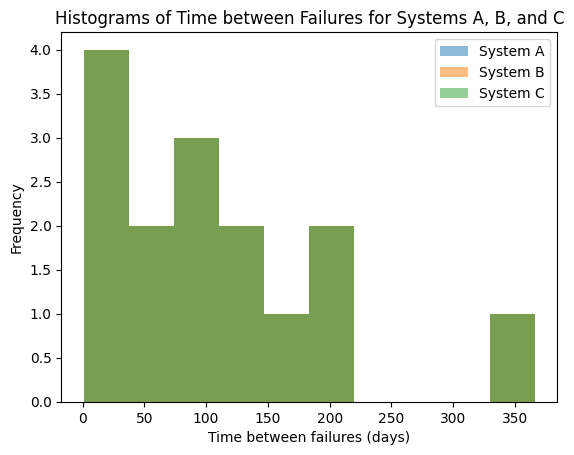

In [ ]:
import matplotlib.pyplot as plt

data_A = [213, 77, 366, 193, 52, 24, 117, 1, 51, 5, 76, 75, 160, 29, 139]
data_B = [1, 5, 24, 29, 51, 52, 75, 76, 77, 117, 139, 160, 193, 213, 366]
data_C = [366, 213, 193, 160, 139, 117, 77, 76, 75, 52, 51, 29, 24, 5, 1]

plt.hist(data_A, bins=10, alpha=0.5, label='System A')
plt.hist(data_B, bins=10, alpha=0.5, label='System B')
plt.hist(data_C, bins=10, alpha=0.5, label='System C')

plt.legend(loc='upper right')
plt.xlabel('Time between failures (days)')
plt.ylabel('Frequency')
plt.title('Histograms of Time between Failures for Systems A, B, and C')

plt.show()

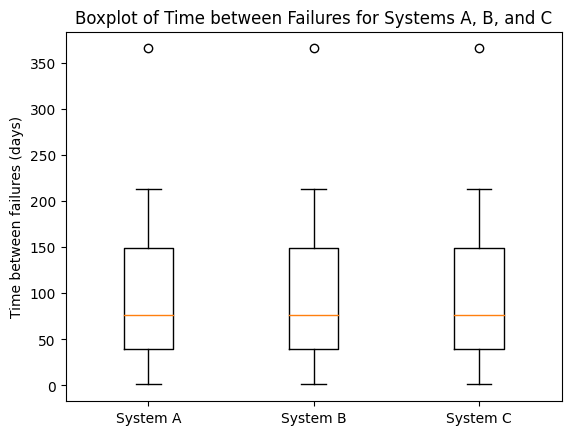

In [ ]:
plt.boxplot([data_A, data_B, data_C], labels=['System A', 'System B', 'System C'])
plt.ylabel('Time between failures (days)')
plt.title('Boxplot of Time between Failures for Systems A, B, and C')

plt.show()


In [ ]:
# (a) sum i = 0 to 100 (i^3 + 4i^2)
sum_a = 0
for i in range(101):
    sum_a += i**3 + (4*i)**2

# (b) sum i = 1 to 25 ((2^i)/i + (3^i)/(i^2))
sum_b = 0
for i in range(1, 26):
    sum_b += (2**i)/i + (3**i)/(i**2)

print("Result of (a):", sum_a)
print("Result of (b):", sum_b)

Result of (a): 30916100
Result of (b): 2129170436.8143802


In [ ]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n-1)

# Read input from the user
number = int(input("Enter a positive number: "))

# Check if the number is positive
if number < 0:
    print("Factorial is not defined for negative numbers.")
else:
    result = factorial(number)
    print(f"The factorial of {number} is: {result}")

Enter a positive number: 3
The factorial of 3 is: 6


In [ ]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Treatments': ['small stones', 'large stones', 'total'],
    'A': ['81/087', '192/263', '273/350'],
    'B': ['234/270', '55/080', '289/350']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

     Treatments        A        B
0  small stones   81/087  234/270
1  large stones  192/263   55/080
2         total  273/350  289/350


In [ ]:
import scipy.stats as stats

# Given data
mean_original = 0.2508
std_dev_original = 0.0005
specification_mean = 0.25
specification_tolerance = 0.0015
target_mean = 0.2500
target_nonconformance = 100 / 1000000  # 100 ppm to fraction

# (a) Fraction of shafts conforming to specifications
lower_limit = specification_mean - specification_tolerance
upper_limit = specification_mean + specification_tolerance
fraction_within_spec = stats.norm.cdf(upper_limit, mean_original, std_dev_original) - stats.norm.cdf(lower_limit, mean_original, std_dev_original)
print(f"(a) Fraction within specifications: {fraction_within_spec:.4f}")

# (b) Non-conformance level after re-centering
nonconformance_target_mean = stats.norm.cdf(specification_mean - specification_tolerance, target_mean, std_dev_original) + \
                             (1 - stats.norm.cdf(specification_mean + specification_tolerance, target_mean, std_dev_original))
print(f"(b) Non-conformance level after re-centering: {nonconformance_target_mean:.4%}")

# (c) Target value for standard deviation to achieve 100 ppm nonconformance
std_dev_target = stats.norm.ppf(target_nonconformance, target_mean, std_dev_original)
print(f"(c) Target standard deviation for 100 ppm nonconformance: {std_dev_target:.6f}")

(a) Fraction within specifications: 0.9192
(b) Non-conformance level after re-centering: 0.2700%
(c) Target standard deviation for 100 ppm nonconformance: 0.248140


In [ ]:
from scipy.stats import norm

# Given values
mu_0 = 50          # null hypothesis mean
mu_1 = mu_0 + 2    # minimal difference of interest
sigma = 5           # standard deviation
n = 25             # sample size
alpha = 0.05        # significance level

# Calculate the critical value for the given alpha
critical_value = norm.ppf(1 - alpha)

# Calculate the standard error of the sample mean
standard_error = sigma / (n**0.5)

# Calculate the z-value for the alternative hypothesis mean
z_alternative = (mu_1 - mu_0) / standard_error

# Calculate beta
beta = norm.cdf(critical_value - z_alternative)

# Output the results
print(f"Critical Value: {critical_value:.4f}")
print(f"Beta: {beta:.4f}")

Critical Value: 1.6449
Beta: 0.3612


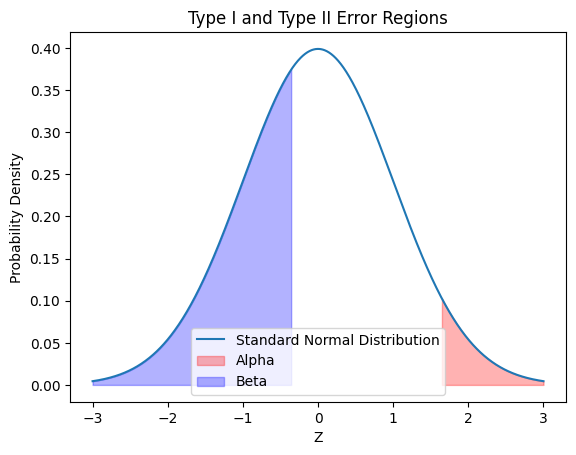

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of values for the standard normal distribution
x = np.linspace(-3, 3, 1000)

# Plot the standard normal distribution
plt.plot(x, norm.pdf(x, 0, 1), label='Standard Normal Distribution')

# Shade the region for alpha
plt.fill_between(x, 0, norm.pdf(x, 0, 1), where=(x > critical_value), color='red', alpha=0.3, label='Alpha')

# Shade the region for beta
plt.fill_between(x, 0, norm.pdf(x, 0, 1), where=(x < critical_value - z_alternative), color='blue', alpha=0.3, label='Beta')

# Add labels and legend
plt.title('Type I and Type II Error Regions')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend()

# Display the plot
plt.show()